In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("employees.csv")

In [3]:
data.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [4]:
data = data[data["AbsentHours"] != 0]

In [5]:
x1 = data["Age"]
x2 = data["LengthService"]
y  = data["AbsentHours"]

Text(0, 0.5, 'Absent Hours')

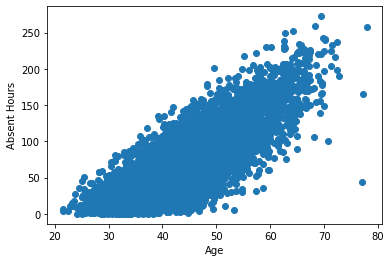

In [6]:
plt.scatter(x1, y)
plt.xlabel("Age")
plt.ylabel("Absent Hours")

Text(0, 0.5, 'Absent Hours')

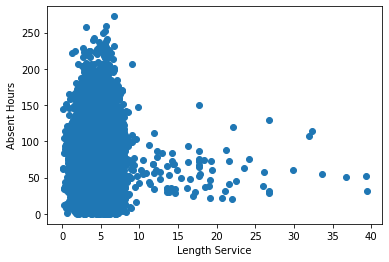

In [7]:
plt.scatter(x2, y)
plt.xlabel("Length Service")
plt.ylabel("Absent Hours")

In [8]:
x_train_1 = x1.values.reshape(-1, 1)
x_train_2 = x2.values.reshape(-1, 1)
y_train = y.values

In [9]:
# Parameterberechnung Regression:
reg_1 = LinearRegression().fit(x_train_1, y_train)
reg_2 = LinearRegression().fit(x_train_2, y_train)
param1 = [reg_1.coef_[0], reg_1.intercept_]
param2 = [reg_2.coef_[0], reg_2.intercept_]
# Bestimmtheitsmass R2
r2_1 = reg_1.score(x_train_1, y_train)
r2_2 = reg_2.score(x_train_2, y_train)

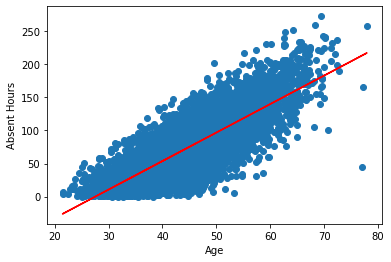

In [10]:
plt.scatter(x1, y)
plt.plot(x1, param1[0] * x1 + param1[1], color = "r")
plt.xlabel("Age")
plt.ylabel("Absent Hours")
plt.show()

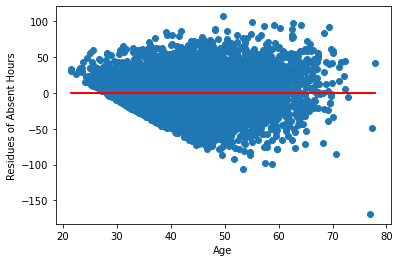

In [11]:
plt.scatter(x1, y - (param1[0] * x1 + param1[1]))
plt.plot(x1, 0 * x1, color = "r")
plt.xlabel("Age")
plt.ylabel("Residues of Absent Hours")
plt.show()

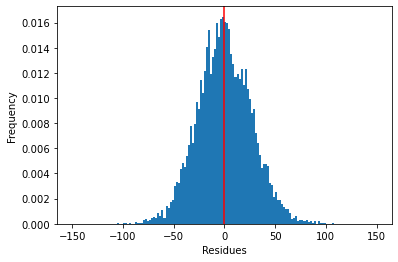

In [12]:
plt.hist(y - (param1[0] * x1 + param1[1]), bins = 150, density = True, range = (-150, 150))
plt.axvline((y - (param1[0] * x1 + param1[1])).mean(), color = "r")
plt.xlabel("Residues")
plt.ylabel("Frequency")
plt.show()

In [13]:
print("R2: " + str(r2_1))

R2: 0.6493487820751211


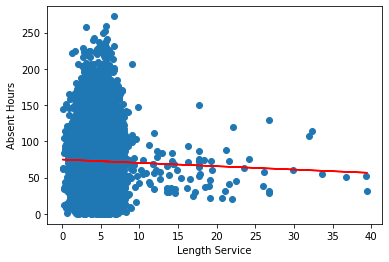

In [14]:
plt.scatter(x2, y)
plt.plot(x2, param2[0] * x2 + param2[1], color = "r")
plt.xlabel("Length Service")
plt.ylabel("Absent Hours")
plt.show()

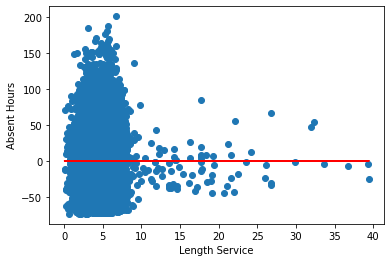

In [15]:
plt.scatter(x2, y - (param2[0] * x2 + param2[1]))
plt.plot(x2, 0 * x2, color = "r")
plt.xlabel("Length Service")
plt.ylabel("Absent Hours")
plt.show()

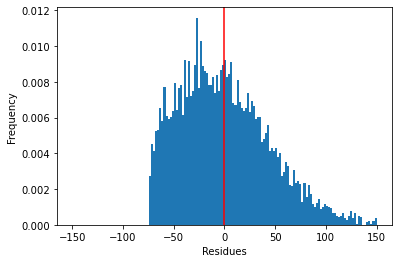

In [16]:
plt.hist(y - (param2[0] * x2 + param2[1]), bins = 150, density = True, range = (-150, 150))
plt.axvline((y - (param2[0] * x2 + param2[1])).mean(), color = "r")
plt.xlabel("Residues")
plt.ylabel("Frequency")
plt.show()

In [17]:
print("R2: " + str(r2_2))

R2: 0.0005010210095048873


I wouldn't recommend to use the Length of Service for a correlation with sickness days.
If minimizing sickness is very important to the company i would recommend hiring young people over older people.